In [ ]:
cd drive/My Drive/Bhavana_Dataset(AGE)/AngleClosureGlaucomaDataset

[Errno 2] No such file or directory: 'drive/My Drive/Bhavana_Dataset(AGE)/AngleClosureGlaucomaDataset'
/content/drive/My Drive/Bhavana_Dataset(AGE)/AngleClosureGlaucomaDataset


In [ ]:
import pandas as pd
import numpy as np
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
glaucoma_data = pd.read_excel('KirschCanny.xlsx')

In [ ]:
glaucoma_data.head()

,contrast,correlation,energy,entropy,homogenity,sumofsquares,sumaverage,sumvariance,sumentropy,differencevariance,differenceentropy,imcorrelation1,imcorrelation2,acw,tial,tiar,class
0,876696,0.794965,0.782117,0.777659,0.939001,1.007746,2.589055,3.619826,0.634762,0.901523,0.418518,-0.427808,0.587421,12.417210,50.713104,54.625850,0
1,652866,0.749120,0.800315,0.689011,0.946135,0.613324,2.430883,2.163636,0.565350,0.728602,0.377648,-0.414564,0.550048,12.766860,44.209367,51.189105,0
2,897722,0.786121,0.761881,0.834138,0.933473,0.989247,2.606359,3.539188,0.679562,0.946953,0.446129,-0.409976,0.591262,11.843102,49.852332,59.431839,0
3,886402,0.776906,0.762713,0.826456,0.933806,0.936426,2.598658,3.333199,0.671582,0.937824,0.443336,-0.421490,0.597358,12.214673,18.855062,24.666811,1
4,730968,0.785959,0.811984,0.675243,0.948024,0.804881,2.488765,2.879097,0.553036,0.761926,0.368934,-0.445033,0.566195,11.875336,85.406289,89.199509,0


In [ ]:
glaucoma_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   contrast            100 non-null    int64  
 1   correlation         100 non-null    float64
 2   energy              100 non-null    float64
 3   entropy             100 non-null    float64
 4   homogenity          100 non-null    float64
 5   sumofsquares        100 non-null    float64
 6   sumaverage          100 non-null    float64
 7   sumvariance         100 non-null    float64
 8   sumentropy          100 non-null    float64
 9   differencevariance  100 non-null    float64
 10  differenceentropy   100 non-null    float64
 11  imcorrelation1      100 non-null    float64
 12  imcorrelation2      100 non-null    float64
 13  acw                 100 non-null    float64
 14  tial                100 non-null    float64
 15  tiar                100 non-null    float64
 16  class    

In [ ]:
glaucoma_data.describe()

,contrast,correlation,energy,entropy,homogenity,sumofsquares,sumaverage,sumvariance,sumentropy,differencevariance,differenceentropy,imcorrelation1,imcorrelation2,acw,tial,tiar,class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,666529.670000,0.756061,0.799514,0.694145,0.945780,0.652191,2.445871,2.310524,0.569772,0.738690,0.379521,-0.415190,0.551302,12.122796,49.254270,51.560224,0.200000
std,95661.195789,0.019759,0.020663,0.068767,0.006066,0.127402,0.070620,0.461378,0.053907,0.090944,0.032947,0.012353,0.026617,0.549334,20.498450,20.260891,0.402015
min,393740.000000,0.640419,0.757594,0.499679,0.933473,0.258072,2.240608,0.891565,0.415608,0.503967,0.283596,-0.445033,0.440140,10.761774,0.985500,0.572960,0.000000
25%,610415.000000,0.747098,0.784054,0.649701,0.941690,0.588962,2.408225,2.076883,0.534517,0.685544,0.358715,-0.421000,0.538571,11.781769,35.188662,37.351593,0.000000
50%,669797.000000,0.756226,0.799954,0.692164,0.945748,0.652899,2.443991,2.313808,0.567808,0.742476,0.380520,-0.415551,0.553350,12.116464,49.732319,53.747425,0.000000
75%,726834.500000,0.768581,0.813303,0.741979,0.949630,0.720561,2.487609,2.543519,0.607297,0.802492,0.401437,-0.410316,0.568584,12.441141,63.138057,65.783244,0.000000
max,897722.000000,0.800875,0.859498,0.841082,0.962797,1.008939,2.634708,3.636580,0.686019,0.946953,0.446129,-0.331118,0.613779,14.212093,97.945941,99.290512,1.000000


In [ ]:
glaucoma_data.shape

(100, 17)

Text(0.5, 1.0, 'Class distributions \n (0 -> No Glaucoma  1 -> Glaucoma)')

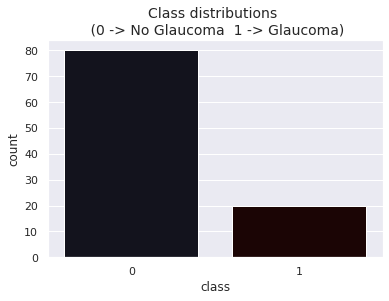

In [ ]:
colors = ["#11111F", "#1F0101"]
sns.countplot('class', data=glaucoma_data, palette=colors)
plt.title('Class distributions \n (0 -> No Glaucoma  1 -> Glaucoma)', fontsize=14)

In [ ]:
X = glaucoma_data.drop(['class'],axis=1)
y = glaucoma_data['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(p=0.1))

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p=0.1))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=100)
#score, acc = classifier.evaluate(X_train, y_train,
 #                           batch_size=10)
#print('Train score:', score)
#print('Train accuracy:', acc)

Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.7500
Epoch 2/100
80/80 [==============================] - 0s 297us/step - loss: 0.6897 - accuracy: 0.8000
Epoch 3/100
80/80 [==============================] - 0s 335us/step - loss: 0.6869 - accuracy: 0.8000
Epoch 4/100
80/80 [==============================] - 0s 200us/step - loss: 0.6841 - accuracy: 0.8000
Epoch 5/100
80/80 [==============================] - 0s 175us/step - loss: 0.6808 - accuracy: 0.8000
Epoch 6/100
80/80 [==============================] - 0s 173us/step - loss: 0.6768 - accuracy: 0.8000
Epoch 7/100
80/80 [==============================] - 0s 164us/step - loss: 0.6725 - accuracy: 0.8000
Epoch 8/100
80/80 [==============================] - 0s 169us/step - loss: 0.6677 - accuracy: 0.8000
Epoch 9/100
80/80 [==============================] - 0s 170us/step - loss: 0.6612 - accuracy: 0.8000
Epoch 10/100
80/80 [==============================] - 0s 181us/step - loss: 0.6549 - accuracy

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [ ]:
#score, acc = classifier.evaluate(X_test, y_test,
 #                           batch_size=10)
#print('Test score:', score)
#print('Test accuracy:', acc)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


Text(0.5, 12.5, 'Predicted label')

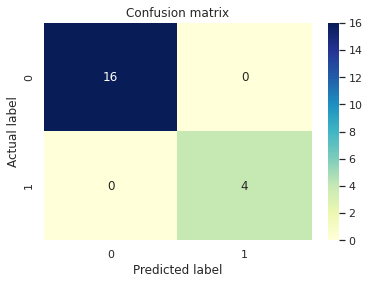

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



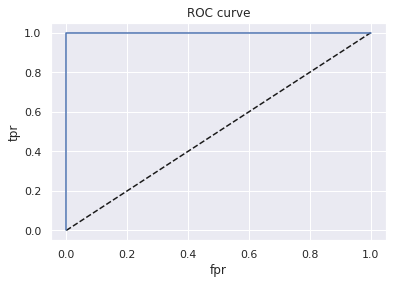

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0